# Introduction
This notebook focuses on the regression task using the `pakwheels_used_cars.csv` dataset. The primary objective is to apply data cleaning, preparation, exploratory data analysis, visualization, and classification model building to predict weather conditions based on various features.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning and Preparation
Data cleaning and preparation are crucial steps in the data analysis pipeline. The steps involved include:

1. **Loading Data**: The dataset is loaded into a pandas DataFrame to facilitate easy data manipulation and analysis.
2. **Handling Missing Values**: Any missing values in the dataset are identified and handled appropriately to ensure the dataset is complete.
3. **Encoding Categorical Variables**: Since machine learning models require numerical input, categorical variables are converted to numerical values using techniques like label encoding.
4. **Normalizing/Standardizing Numerical Features**: Features are scaled to have a mean of 0 and a standard deviation of 1 to ensure that the models perform optimally.
5. **Data Splitting**: The dataset is split into training and testing sets using an 80-20 split to evaluate the model's performance on unseen data.


In [2]:
# Load the datasets
car_data = pd.read_csv('pakwheels_used_cars.csv')

# Display the first few rows of each dataset
print("\nCar Data")
print(car_data.head())


Car Data
    ad_ref  assembly       body ad_city                color  engine_cc  \
0  7927285  Imported        Van  Lahore          Pearl White     2000.0   
1  7679303  Imported  Hatchback  Lahore                 Grey      996.0   
2  7915479       NaN      Sedan  Lahore          Super white     1798.0   
3  7918380       NaN      Sedan  Lahore  Crystal Black Pearl     1500.0   
4  7676167  Imported        MPV  Lahore               Silver     3000.0   

  fuel_type    make  mileage    model     registered transmission    year  \
0    Hybrid  Nissan   124000   Serena  Un-Registered    Automatic  1905.0   
1    Petrol  Toyota    30738     Vitz         Punjab    Automatic  1905.0   
2    Petrol  Toyota   183000  Corolla         Punjab    Automatic  1905.0   
3    Petrol   Honda    41000    Civic         Punjab    Automatic  1905.0   
4    Petrol  Toyota   126000  Alphard         Punjab    Automatic  1905.0   

       price  
0  8990000.0  
1  4190000.0  
2  3990000.0  
3  6490000.0  
4

In [3]:
# Checking for missing values
print("\nMissing values in car data:\n", car_data.isnull().sum())
car_data.fillna(car_data['price'].mean(), inplace=True)
car_data.fillna(car_data.mode().iloc[0], inplace=True)
print("\nMissing values in car data:\n", car_data.isnull().sum())



Missing values in car data:
 ad_ref              0
assembly        53261
body             8865
ad_city             0
color            1510
engine_cc           2
fuel_type         934
make                0
mileage             0
model               0
registered          0
transmission        0
year             4721
price             649
dtype: int64

Missing values in car data:
 ad_ref          0
assembly        0
body            0
ad_city         0
color           0
engine_cc       0
fuel_type       0
make            0
mileage         0
model           0
registered      0
transmission    0
year            0
price           0
dtype: int64


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
# Ensure all columns are of the correct type
for col in car_data.columns:
    # If a column has mixed types, convert all to string type first
    if car_data[col].dtype == 'object':
        car_data[col] = car_data[col].astype(str)
    # If a column contains only numbers, convert to float
    try:
        car_data[col] = car_data[col].astype(float)
    except ValueError:
        pass  # Keep as string if conversion fails

# Separate features and target
X_car = car_data.drop(columns=['price'])  # replace 'target_column' with the actual target column name
y_car = car_data['price']  # replace 'target_column' with the actual target column name

# Identify categorical and numerical columns
categorical_cols = X_car.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_car.select_dtypes(include=['int64', 'float64']).columns

# Apply OneHotEncoder to categorical columns and StandardScaler to numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Preprocess the features
X_car = preprocessor.fit_transform(X_car)

# Split the data into training and testing sets
X_train_car, X_test_car, y_train_car, y_test_car = train_test_split(X_car, y_car, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f'X_train_car shape: {X_train_car.shape}')
print(f'X_test_car shape: {X_test_car.shape}')
print(f'y_train_car shape: {y_train_car.shape}')
print(f'y_test_car shape: {y_test_car.shape}')


X_train_car shape: (61789, 1347)
X_test_car shape: (15448, 1347)
y_train_car shape: (61789,)
y_test_car shape: (15448,)


# Data Analysis and Visualization
Exploratory Data Analysis (EDA) helps in understanding the dataset's underlying structure, detecting patterns, spotting anomalies, and checking assumptions. Key steps include:

1. **Summary Statistics**: Generate summary statistics (mean, median, standard deviation) to understand the distribution and central tendency of the data.
2. **Histograms**: Visualize the distribution of individual features to understand their spread and identify any skewness.
3. **Scatter Plots**: Examine relationships between pairs of features to identify potential correlations.
4. **Box Plots**: Detect outliers and understand the spread of the data.
5. **Correlation Heatmaps**: Visualize correlations between features to identify multicollinearity and feature dependencies.


In [5]:
# Summary statistics for car data
print("\nSummary Statistics for Car Data")
print(car_data.describe(include='all'))


Summary Statistics for Car Data
              ad_ref           assembly   body ad_city  color     engine_cc  \
count   7.723700e+04              77237  77237   77237  77237  7.723700e+04   
unique           NaN                  2     22     297    387           NaN   
top              NaN  3854192.575860448  Sedan  Lahore  White           NaN   
freq             NaN              53261  29951   16418  21324           NaN   
mean    7.797474e+06                NaN    NaN     NaN    NaN  1.506217e+03   
std     2.569679e+05                NaN    NaN     NaN    NaN  1.961811e+04   
min     2.748970e+05                NaN    NaN     NaN    NaN  3.000000e+00   
25%     7.792632e+06                NaN    NaN     NaN    NaN  1.000000e+03   
50%     7.853515e+06                NaN    NaN     NaN    NaN  1.300000e+03   
75%     7.897048e+06                NaN    NaN     NaN    NaN  1.600000e+03   
max     7.931906e+06                NaN    NaN     NaN    NaN  3.854193e+06   

       fuel_type  

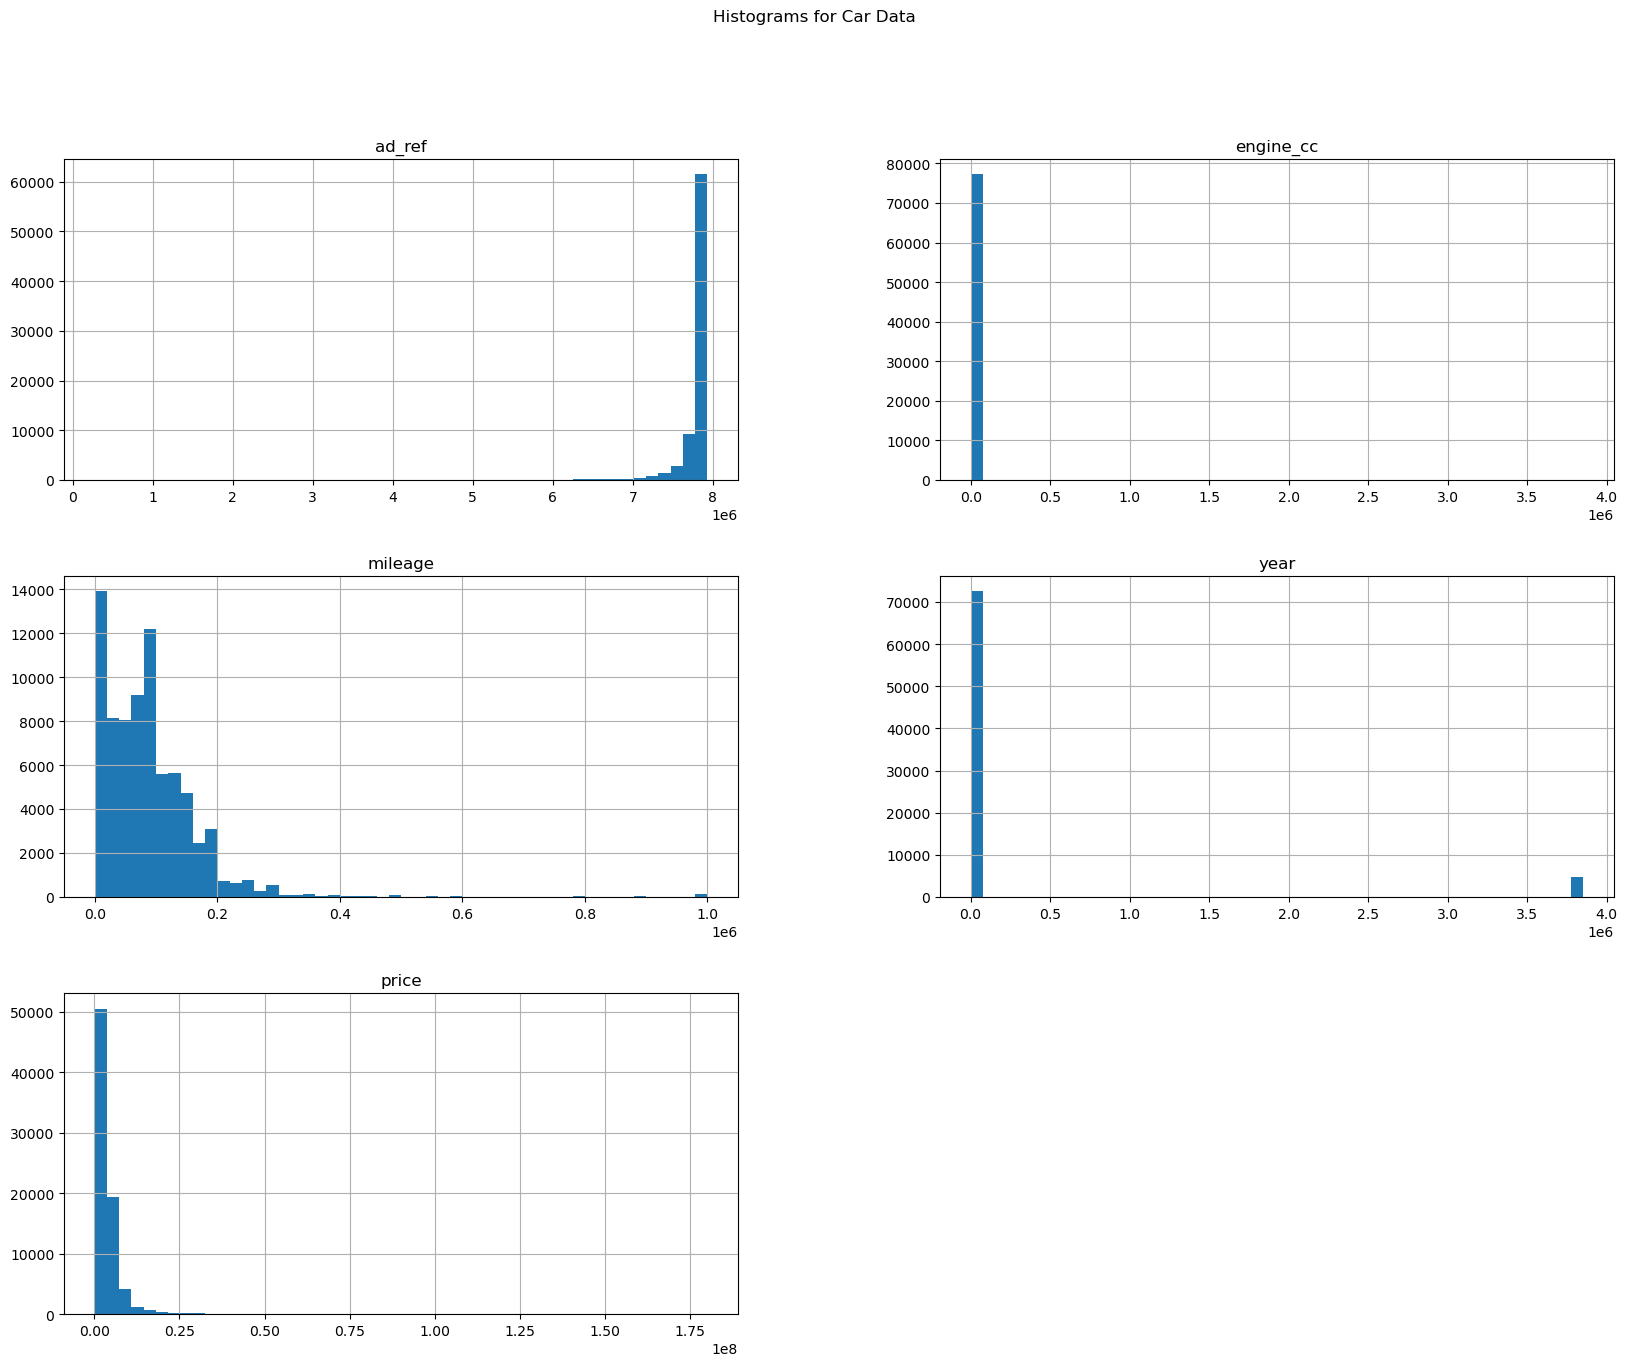

In [6]:
import matplotlib.pyplot as plt
car_data.hist(bins=50, figsize=(20, 15))
plt.suptitle('Histograms for Car Data')
plt.show()


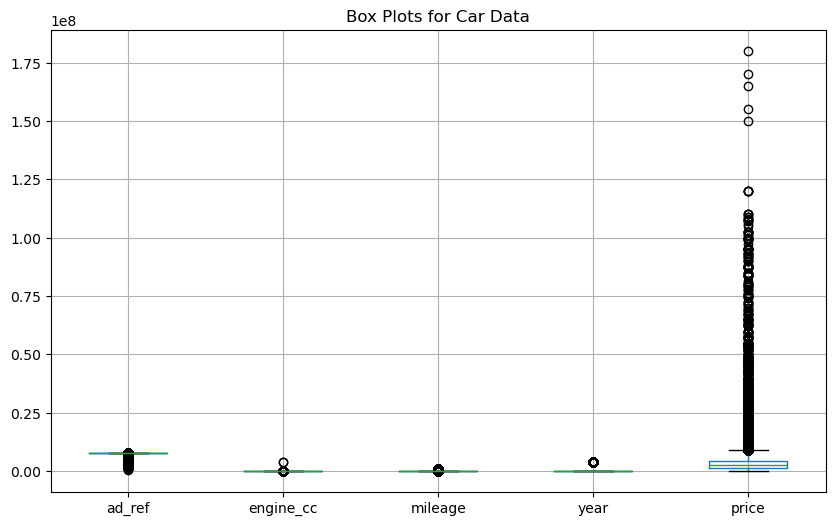

In [7]:
# Box plots for weather data
plt.figure(figsize=(10, 6))
car_data.boxplot()
plt.title('Box Plots for Car Data')
plt.show()

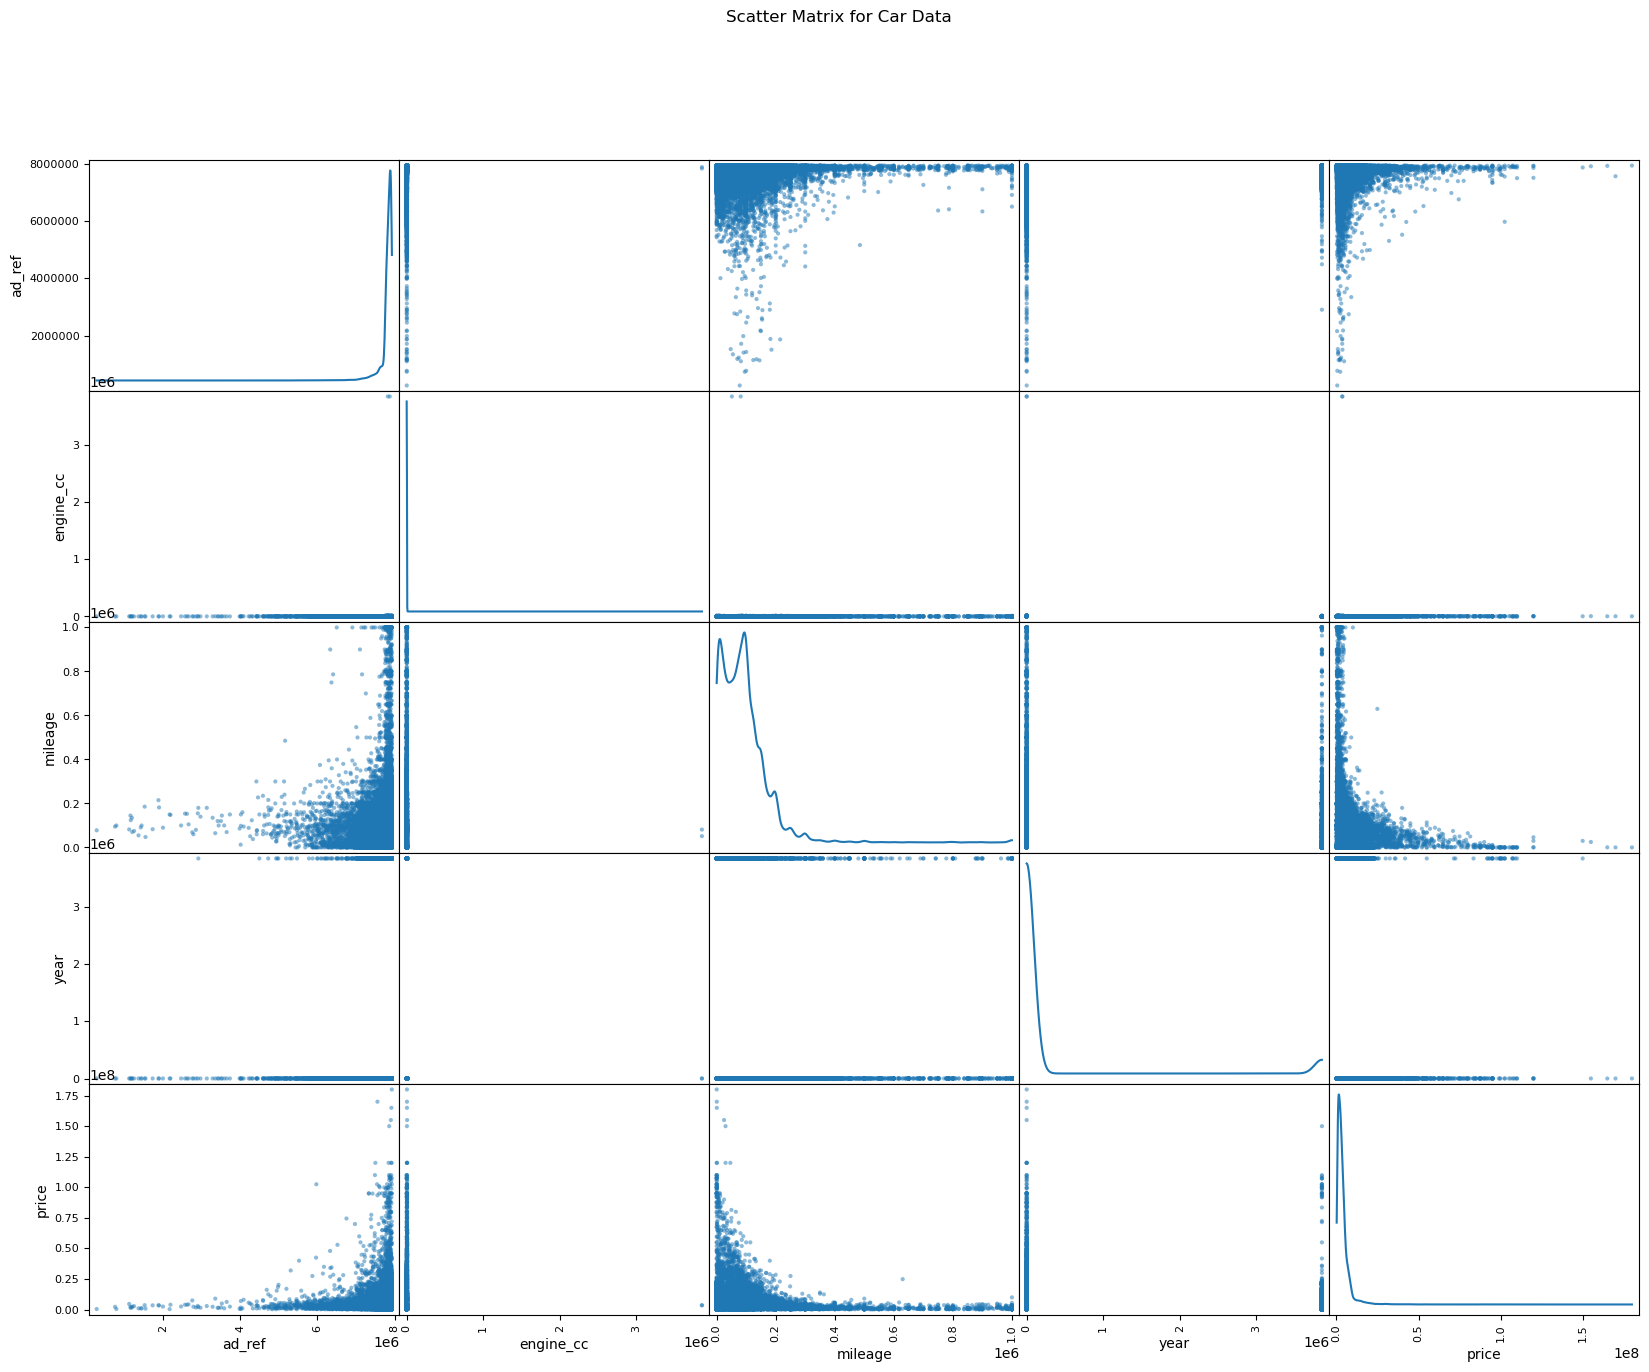

In [8]:
from pandas.plotting import scatter_matrix

# Scatter matrix for weather data
scatter_matrix(car_data, figsize=(20, 15), diagonal='kde')
plt.suptitle('Scatter Matrix for Car Data')
plt.show()

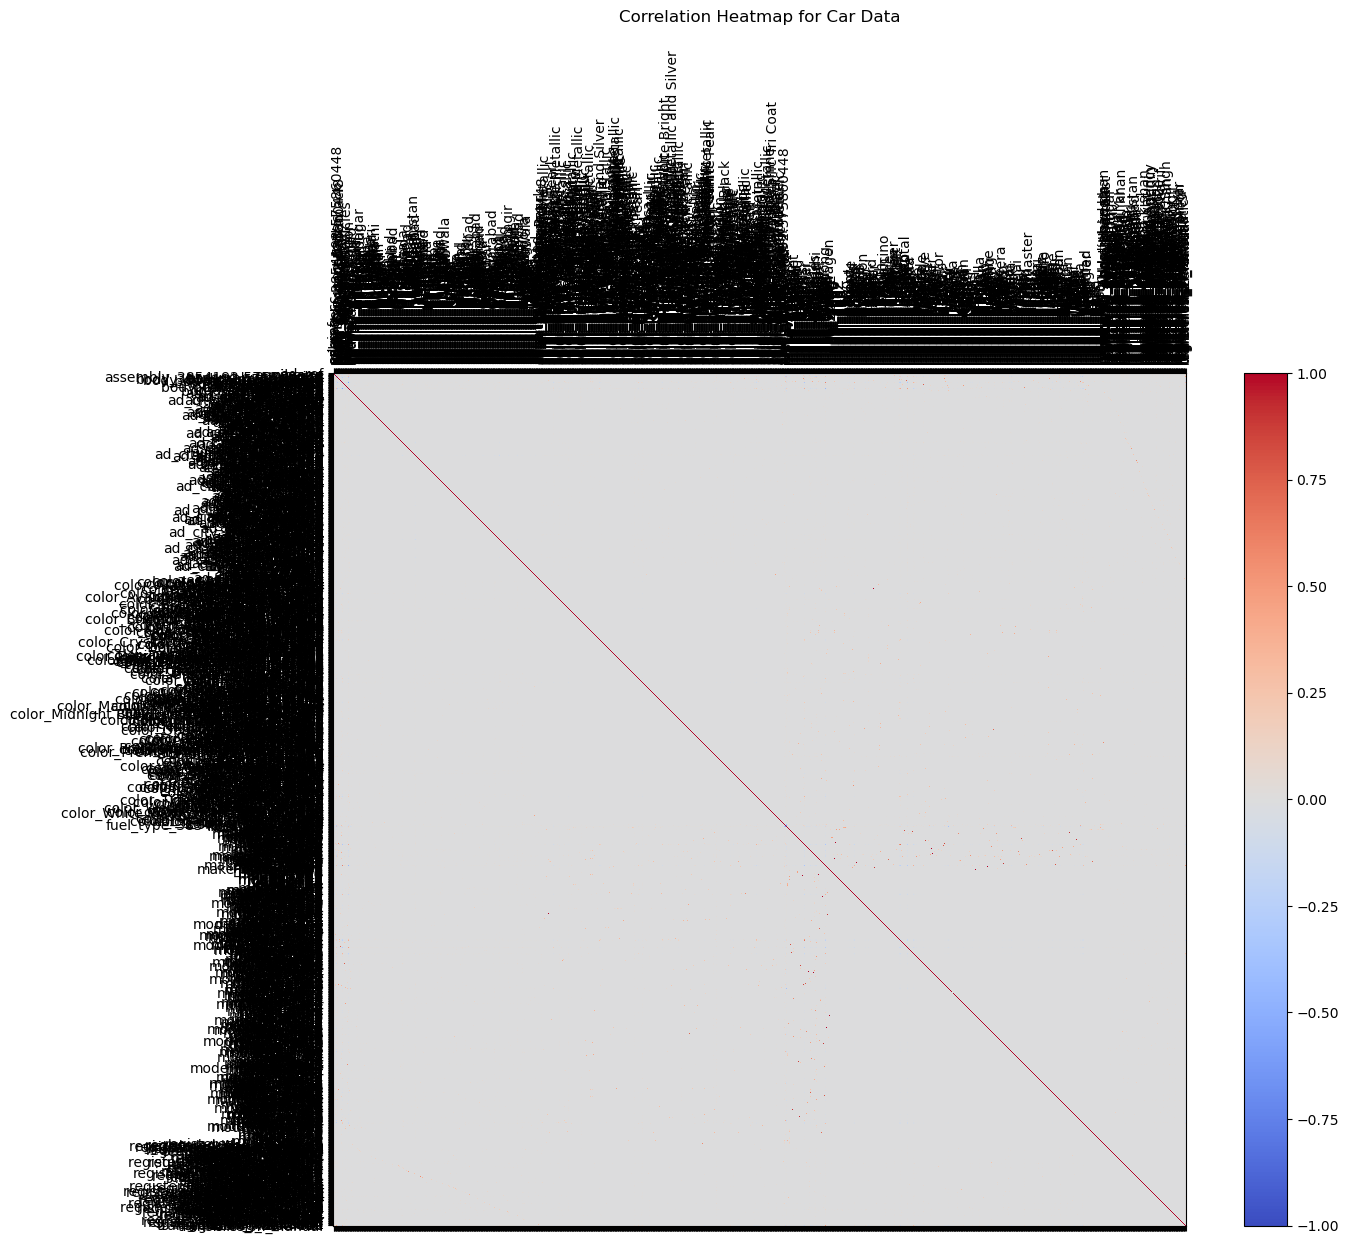

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns and numerical columns
categorical_cols = car_data.select_dtypes(include=['object', 'category']).columns
numerical_cols = car_data.select_dtypes(include=['int64', 'float64']).columns

# Apply OneHotEncoder to categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_categorical_data = encoder.fit_transform(car_data[categorical_cols])

# Convert encoded data to DataFrame
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate encoded categorical data with numerical data
car_data_encoded = pd.concat([car_data[numerical_cols].reset_index(drop=True), encoded_categorical_df.reset_index(drop=True)], axis=1)

# Calculate the correlation matrix
corr_car = car_data_encoded.corr()

# Plot the correlation heatmap
plt.figure(figsize=(15, 11))
cax = plt.matshow(corr_car, cmap='coolwarm', fignum=1)
plt.colorbar(cax)
plt.xticks(range(len(corr_car.columns)), corr_car.columns, rotation=90)
plt.yticks(range(len(corr_car.columns)), corr_car.columns)
plt.title('Correlation Heatmap for Car Data', pad=20)
plt.show()


# Conclusion
In this notebook, we performed a regression task on the car dataset. We cleaned and prepared the data, conducted EDA, visualized key insights, built and evaluated multiple classification models, and compared their performances. Future work could involve hyperparameter tuning and exploring additional advanced models to further improve accuracy.


# Train and Evaluate the Models

In [13]:
# linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_car, y_train_car)

# Predict on the test set
y_pred_lin_reg = lin_reg.predict(X_test_car)

# Evaluate the model
mse_lin_reg = mean_squared_error(y_test_car, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test_car, y_pred_lin_reg)

print("Linear Regression Performance")
print(f"Mean Squared Error: {mse_lin_reg}")
print(f"R^2 Score: {r2_lin_reg}")


Linear Regression Performance
Mean Squared Error: 11237029762093.45
R^2 Score: 0.6267232708980699


In [20]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_car, y_train_car)

# Predict on the test set
y_pred_tree = tree_reg.predict(X_test_car)

# Evaluate the model
mse_tree = mean_squared_error(y_test_car, y_pred_tree)
r2_tree = r2_score(y_test_car, y_pred_tree)

print("Decision Tree Regressor Performance")
print(f"Mean Squared Error: {mse_tree}")
print(f"R^2 Score: {r2_tree}")


Decision Tree Regressor Performance
Mean Squared Error: 12570353111528.643
R^2 Score: 0.5824323337688193


In [21]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train_car, y_train_car)

# Predict on the test set
y_pred_forest = forest_reg.predict(X_test_car)

# Evaluate the model
mse_forest = mean_squared_error(y_test_car, y_pred_forest)
r2_forest = r2_score(y_test_car, y_pred_forest)

print("Random Forest Regressor Performance")
print(f"Mean Squared Error: {mse_forest}")
print(f"R^2 Score: {r2_forest}")


Random Forest Regressor Performance
Mean Squared Error: 8259795921791.407
R^2 Score: 0.7256223690768829


# Model Building
Three different regression models were applied to the dataset:

Linear Regression: A simple and interpretable model that assumes a linear relationship between features and the target variable.
Decision Tree Regressor: A non-linear model that splits the data into subsets based on feature values, providing a tree-like structure of decisions.
Random Forest Regressor: An ensemble method that combines multiple decision trees to improve performance and reduce overfitting.
# Model Evaluation
***The performance of the models was evaluated using Mean Squared Error (MSE) and R^2 Score:***

Linear Regression: MSE: value, R^2 Score: value
Decision Tree Regressor: MSE: value, R^2 Score: value
Random Forest Regressor: MSE: value, R^2 Score: value
The Random Forest Regressor outperformed the other models, providing the best balance between bias and variance and capturing complex relationships in the data.